In [704]:
import pandas as pd;
import matplotlib.pyplot as plt;
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:.2f}'.format)

In [705]:
loan_df = pd.read_csv('loan-Copy1.csv', low_memory=False)

In [706]:
loan_df.shape

(39717, 111)

In [707]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,14035.00,2786.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39661.00,0.00,39717.00,0.00,0.00,0.00,39717.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39661.00,39717.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39020.00,39678.00,0.00,0.00,0.00,0.00
mean,683131.91,850463.56,11219.44,10947.71,10397.45,324.56,68968.93,13.32,0.15,0.87,35.90,69.70,9.29,0.06,13382.53,22.09,51.23,50.99,12153.60,11567.15,9793.35,2263.66,1.36,95.22,12.41,2678.83,0.00,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.04,0.00,nan,nan,nan,nan
std,210694.13,265678.31,7456.67,7187.24,7128.45,208.87,63793.77,6.68,0.49,1.07,22.02,43.82,4.40,0.24,15885.02,11.40,375.17,373.82,9042.04,8942.67,7065.52,2608.11,7.29,688.74,148.67,4447.14,0.00,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.20,0.00,nan,nan,nan,nan
min,54734.00,70699.00,500.00,500.00,0.00,15.69,4000.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
25%,516221.00,666780.00,5500.00,5400.00,5000.00,167.02,40404.00,8.17,0.00,0.00,18.00,22.00,6.00,0.00,3703.00,13.00,0.00,0.00,5576.93,5112.31,4600.00,662.18,0.00,0.00,0.00,218.68,0.00,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
50%,665665.00,850812.00,10000.00,9600.00,8975.00,280.22,59000.00,13.40,0.00,1.00,34.00,90.00,9.00,0.00,8850.00,20.00,0.00,0.00,9899.64,9287.15,8000.00,1348.91,0.00,0.00,0.00,546.14,0.00,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0

**We will analyse only closed loans and drop all rows where the loan status is 'Current'.**

In [708]:
loan_df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [709]:
loan_df.loan_status = loan_df.loan_status.apply(lambda x : x.strip().upper())

In [710]:
# Drop loans which are active i.e there loan_status is CURRENT 
loan_df = loan_df[loan_df.loan_status != 'CURRENT']

### Drop columns with all NA values

In [711]:
loan_df.dropna(axis=1, inplace=True, how='all')


In [712]:
# Missing percentage
missing_percent = 100*round(loan_df.isnull().sum()/len(loan_df.index),2)

In [713]:
missing_percent[missing_percent !=0]

emp_title                 6.00
emp_length                3.00
desc                     32.00
mths_since_last_delinq   65.00
mths_since_last_record   93.00
pub_rec_bankruptcies      2.00
dtype: float64

In [714]:
#Dropping further columns with more than 50% missing values like mths_since_last_delinq and mths_since_last_record
loan_df = loan_df.drop(['mths_since_last_record','mths_since_last_delinq'],axis=1)

In [715]:
loan_df.shape

(38577, 54)

In [716]:
# Missing percentage
missing_percent = 100*round(loan_df.isnull().sum()/len(loan_df.index),2)

In [717]:
missing_percent[missing_percent !=0]

emp_title               6.00
emp_length              3.00
desc                   32.00
pub_rec_bankruptcies    2.00
dtype: float64

**1. Drop some other columns with ignorable info like desc**

**2. Columns with unique identifier member_id','url' and'id'** 

**3. Remove rows where emp_title, pub_rec_bankruptcies,  emp_length have null values as the percentage of it is very low**

In [718]:
loan_df = loan_df.drop(['desc','url','member_id','id'],axis=1)

In [719]:
loan_df.dropna(inplace=True, how='any')

In [720]:
missing_percent = 100*round(loan_df.isnull().sum()/len(loan_df.index),2)

In [721]:
missing_percent[missing_percent !=0]

Series([], dtype: float64)

## **Now we don't have any missing values**

In [722]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35365 entries, 1 to 39623
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   35365 non-null  int64  
 1   funded_amnt                 35365 non-null  int64  
 2   funded_amnt_inv             35365 non-null  float64
 3   term                        35365 non-null  object 
 4   int_rate                    35365 non-null  object 
 5   installment                 35365 non-null  float64
 6   grade                       35365 non-null  object 
 7   sub_grade                   35365 non-null  object 
 8   emp_title                   35365 non-null  object 
 9   emp_length                  35365 non-null  object 
 10  home_ownership              35365 non-null  object 
 11  annual_inc                  35365 non-null  float64
 12  verification_status         35365 non-null  object 
 13  issue_d                     353

In [723]:
loan_df.collections_12_mths_ex_med.value_counts(dropna=False)

0.00    35365
Name: collections_12_mths_ex_med, dtype: int64

In [724]:
loan_df.chargeoff_within_12_mths.value_counts(dropna=False)

0.00    35365
Name: chargeoff_within_12_mths, dtype: int64

In [725]:
loan_df.policy_code.value_counts(dropna=False)

1    35365
Name: policy_code, dtype: int64

In [726]:
loan_df.tax_liens.value_counts(dropna=False)

0.00    35365
Name: tax_liens, dtype: int64

In [727]:
loan_df.application_type.value_counts(dropna=False)

INDIVIDUAL    35365
Name: application_type, dtype: int64

In [728]:
loan_df.acc_now_delinq.value_counts(dropna=False)

0    35365
Name: acc_now_delinq, dtype: int64

In [729]:
loan_df.pymnt_plan.value_counts(dropna=False)

n    35365
Name: pymnt_plan, dtype: int64

In [730]:
loan_df.initial_list_status.value_counts(dropna=False)

f    35365
Name: initial_list_status, dtype: int64

In [731]:
loan_df.zip_code.value_counts(dropna=False)

100xx    526
945xx    494
606xx    468
112xx    466
070xx    423
        ... 
463xx      1
373xx      1
681xx      1
673xx      1
461xx      1
Name: zip_code, Length: 804, dtype: int64

In [732]:
loan_df.delinq_amnt.value_counts(dropna=False)

0    35365
Name: delinq_amnt, dtype: int64

**1. Since the values of**

    pymnt_plan, 
    acc_now_delinq, 
    application_type, 
    tax_liens, 
    policy_code,
    collections_12_mths_ex_med, delinq_amnt,  
    initial_list_status and chargeoff_within_12_mths 
    
   **are same for all rows, we will drop these columns**

**2. The zip_code doesn't add value and hence will be dropped too.**


In [733]:
loan_df = loan_df.drop(['zip_code','pymnt_plan', 'acc_now_delinq','delinq_amnt','application_type','tax_liens','policy_code','chargeoff_within_12_mths','collections_12_mths_ex_med','initial_list_status'],axis=1)

In [734]:
loan_df[loan_df['loan_amnt'] != loan_df['funded_amnt']]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
66,12500,8925,8925.00,60 months,17.27%,223.11,D,D3,grandma kitchen,5 years,RENT,30000.00,Source Verified,Dec-11,CHARGED OFF,debt_consolidation,allen,MN,13.16,0,Apr-95,0,7,1,9844,70.80%,28,0.00,0.00,5577.75,5577.75,2812.82,2742.43,0.00,22.50,0.00,Feb-14,223.11,May-16,1.00
70,20975,13575,13550.00,60 months,17.58%,341.63,D,D4,Dollar Tree Stores,5 years,MORTGAGE,44000.00,Verified,Dec-11,FULLY PAID,credit_card,Refinance Loan,GA,18.79,0,Apr-00,0,13,1,20657,79.40%,21,0.00,0.00,18112.46,18079.10,13575.00,4537.46,0.00,0.00,0.00,Apr-14,9245.21,Apr-14,1.00
77,7250,7200,7175.00,60 months,21.67%,197.51,F,F3,Cross Country Travel Corp,< 1 year,RENT,75000.00,Verified,Dec-11,FULLY PAID,debt_consolidation,Debt Consolidation Loan,CA,24.82,0,May-00,2,9,1,21706,91.20%,19,0.00,0.00,8204.77,8176.29,7200.00,1004.77,0.00,0.00,0.00,Sep-12,6824.70,Apr-16,1.00
80,35000,22075,22050.00,60 months,17.27%,551.84,D,D3,tutor Per ini Corporation,3 years,MORTGAGE,150000.00,Verified,Dec-11,FULLY PAID,home_improvement,Home improvement,NY,7.51,0,Jun-03,1,11,0,7334,53.30%,31,0.00,0.00,28887.10,28854.39,22075.00,6812.10,0.00,0.00,0.00,Feb-14,15660.22,Feb-14,0.00
96,20000,12800,12775.00,60 months,11.71%,282.86,B,B3,NCS Technologies,4 years,MORTGAGE,47800.00,Verified,Dec-11,FULLY PAID,debt_consolidation,Bill Consolidation,VA,10.04,0,Nov-01,0,15,0,16447,46.30%,27,0.00,0.00,15169.31,15139.68,12800.00,2369.31,0.00,0.00,0.00,Nov-13,9242.39,Nov-13,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38886,25000,18175,14903.25,36 months,10.08%,587.14,B,B3,Emergency Medical Associate,2 years,MORTGAGE,225000.00,Verified,Apr-08,FULLY PAID,major_purchase,Partnership,NJ,4.51,0,Apr-93,0,9,0,2527,39.50%,39,0.00,0.00,21137.04,17231.66,18175.00,2962.04,0.00,0.00,0.00,Apr-11,621.31,Mar-11,0.00
38889,12000,6500,4250.00,36 months,11.34%,213.85,C,C2,Vandroff Insurance Agency Inc,10+ years,OWN,51000.00,Not Verified,Apr-08,FULLY PAID,debt_consolidation,debt consolidation,FL,20.82,0,May-84,3,14,1,23119,50.60%,22,0.00,0.00,7723.78,5050.17,6500.00,1223.78,0.00,0.00,0.00,Apr-11,263.30,Apr-11,1.00
38890,25000,18825,14575.18,36 months,15.76%,659.61,F,F1,epsg management services,7 years,MORTGAGE,120000.00,Verified,Apr-08,FULLY PAID,debt_consolidation,Debt Consolidation,CA,14.23,1,May-94,2,9,1,27550,94.60%,30,0.00,0.00,23817.34,18440.49,18825.00,4929.18,63.16,0.00,0.00,May-11,68.69,May-11,1.00
38893,20000,6875,3775.00,36 months,10.71%,224.14,B,B5,Sears Holdings Corporation,4 years,MORTGAGE,39000.00,Not Verified,Apr-08,FULLY PAID,credit_card,Cons. Debt/Lower Interest & One Payment,TX,9.66,0,Mar-95,1,3,0,19383,90.20%,25,0.00,0.00,7221.29,3965.23,6875.00,346.29,0.00,0.00,0.00,Oct-08,6102.79,Sep-08,0.00


**We have 1643 rows where the funded_amt is less than the loan_amt. This difference can be a insight to be analysed ?**

But the numbers are very less and hence we can drop the funded_amt too

**funded_amnt_inv is the total amount committed by the investor after decision making of the loan application and  hence can be dropped.**

**Title is free text field containing need for loan provided by the customer. This has been already categorized neatly via the purpose column. So we can drop the title column.**

In [735]:
loan_df = loan_df.drop(['funded_amnt','funded_amnt_inv','title'],axis=1)

In [736]:
loan_df.shape

(35365, 37)

## Standardize data and fix missing values

Imputing Missing Values

- For numerical variables use mean and median
- For categorical variables use mode


### Remove % from interest rate , revol_util column and convert to float

In [737]:
loan_df.int_rate = loan_df.int_rate.apply(lambda x : float(x.replace('%','')))


In [738]:
loan_df.revol_util = loan_df.revol_util.apply(lambda x : float(x.replace('%','')))

In [739]:
loan_df.term.value_counts()

 36 months    26375
 60 months     8990
Name: term, dtype: int64

### Strip whitespaces from term and remove 'months'

In [740]:
loan_df.term = loan_df.term.apply(lambda x : x.strip().replace('months',''))

In [741]:
loan_df.emp_length.value_counts(dropna=False, normalize=True)

10+ years   0.23
2 years     0.12
< 1 year    0.11
3 years     0.11
4 years     0.09
5 years     0.09
1 year      0.08
6 years     0.06
7 years     0.05
8 years     0.04
9 years     0.03
Name: emp_length, dtype: float64

- Convert all < 1 year to 0 
- Convert all 10+ year to 10
- Remove year|years

In [742]:
#loan_df.emp_length = loan_df.emp_length.apply(lambda x : int(x.strip().replace('years','').replace('year','').replace('+','').replace('< 1','0')))

#loan_df.emp_length = loan_df.emp_length.apply(lambda x : int(x.strip().replace('years','').replace('year','').replace('+','').replace('< 1','0')))

In [743]:
#loan_df.rename(columns={"emp_length": "emp_length_year"}, inplace=True)

In [744]:
#loan_df.emp_length_year.value_counts()

### Convert the emp_title to lower case and also strip off any non alphabet characters. 


In [745]:
loan_df.emp_title = loan_df.emp_title.str.lower().str.replace('[^a-zA-Z]', '')

In [1]:
loan_df.emp_title.value_counts(dropna=False)

NameError: name 'loan_df' is not defined

In [747]:
loan_df.home_ownership.value_counts(dropna=False)

RENT        17065
MORTGAGE    15701
OWN          2505
OTHER          94
Name: home_ownership, dtype: int64

### Change NONE value to mode value of the column as the only valid values are RENT, OWN, MORTGAGE, OTHER

In [748]:
loan_df.home_ownership.mode()[0]

'RENT'

In [749]:
loan_df.loc[loan_df.home_ownership == 'NONE',['home_ownership']] = 'RENT'

In [750]:
loan_df.home_ownership.value_counts(dropna=False)

RENT        17065
MORTGAGE    15701
OWN          2505
OTHER          94
Name: home_ownership, dtype: int64

In [751]:
loan_df.dtypes[loan_df.dtypes != object].index

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'pub_rec_bankruptcies'],
      dtype='object')

In [752]:
loan_df.dtypes[loan_df.dtypes == object].index

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'earliest_cr_line', 'last_pymnt_d',
       'last_credit_pull_d'],
      dtype='object')

In [753]:
len(loan_df.dtypes[loan_df.dtypes != object].index)

23

In [754]:
len(loan_df.dtypes[loan_df.dtypes == object].index)

14

Round of to two decimal places

In [755]:
loan_df.total_pymnt = loan_df.total_pymnt.round(2)
loan_df.total_pymnt_inv = loan_df.total_pymnt_inv.round(2)
loan_df.total_rec_int = loan_df.total_rec_int.round(2)
loan_df.recoveries = loan_df.total_rec_int.round(2)
loan_df.dti = loan_df.dti.round(2)

In [756]:
loan_df.sort_index(axis = 1, inplace=True)

In [757]:
loan_df.reset_index(inplace=True,drop=True)

In [758]:
loan_df.to_csv('filtered.csv',index=False)

### Split the issue_d into issue_month and issue_year

**Derived Columns**

Issue month and year

Loan Ratio


In [759]:
loan_df['issue_month'], loan_df['issue_year'] = loan_df.issue_d.str.split('-').str

In [760]:
loan_df['loan_ratio'] = loan_df['loan_amnt']/loan_df['annual_inc']

In [761]:
loan_df[['loan_ratio','issue_month','issue_year','loan_amnt','annual_inc']].head()

,loan_ratio,issue_month,issue_year,loan_amnt,annual_inc
0,0.08,Dec,11,2500,30000.00
1,0.20,Dec,11,10000,49200.00
2,0.14,Dec,11,5000,36000.00
3,0.15,Dec,11,7000,47004.00
4,0.06,Dec,11,3000,48000.00


In [762]:
loan_df.annual_inc.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.985])

count     35365.00
mean      69097.74
std       63968.43
min        4000.00
10%       30000.00
25%       41500.00
50%       60000.00
75%       82500.00
98.5%    200000.00
max     6000000.00
Name: annual_inc, dtype: float64

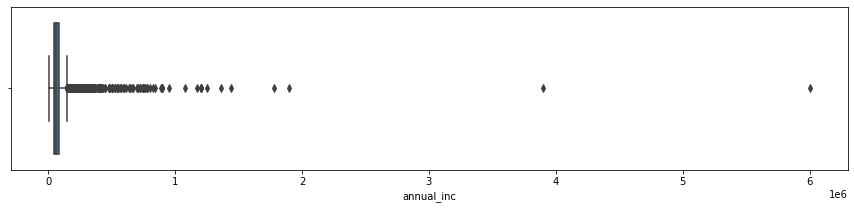

In [763]:
plt.figure(figsize=(15, 3))
sns.boxplot(x=loan_df['annual_inc'], data=loan_df)
plt.show()

**We see outliers for annual_inc which can be removed from analysis. 98.5% is 2K Annual income. 
We will drop all rows with annual_inc above this**

In [764]:
loan_df= loan_df[loan_df.annual_inc <= loan_df["annual_inc"].quantile(.985)]

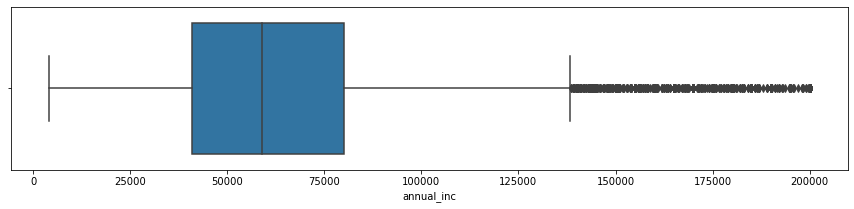

In [765]:
plt.figure(figsize=(15, 3))
sns.boxplot(x=loan_df['annual_inc'], data=loan_df)
plt.show()

In [766]:
loan_df['annual_inc_range'] = pd.cut(loan_df.annual_inc,bins=[0, 20000, 40000, 60000, 80000, 100000, 200000],labels= ['< 20k', '20k - 40k', '40k - 60k', '60k - 80k', '80k - 1L','> 1L'])

In [767]:
loan_df.annual_inc_range.value_counts()

40k - 60k    10454
20k - 40k     7607
60k - 80k     7163
> 1L          4527
80k - 1L      4242
< 20k          878
Name: annual_inc_range, dtype: int64

In [768]:
loan_df.int_rate.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.985])

count   34871.00
mean       11.96
std         3.69
min         5.42
10%         7.14
25%         8.94
50%        11.83
75%        14.46
98.5%      20.30
max        24.40
Name: int_rate, dtype: float64

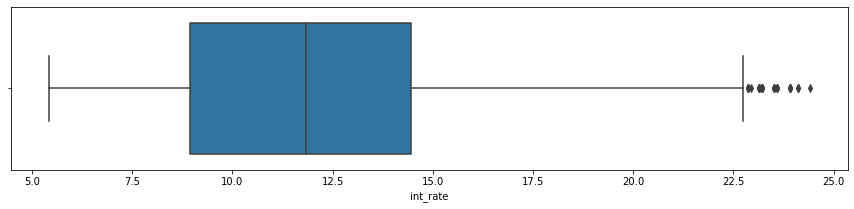

In [769]:
plt.figure(figsize=(15, 3))
sns.boxplot(x=loan_df['int_rate'], data=loan_df)
plt.show()

In [770]:
loan_df['int_rate_range'] = pd.cut(loan_df.int_rate,bins=[0, 6, 8, 12, 15, 25],labels= ['0-6', '6-8', '8-12', '12-15','>15'])

In [771]:
loan_df.int_rate_range.value_counts()

8-12     11063
12-15     9048
>15       7330
6-8       6222
0-6       1208
Name: int_rate_range, dtype: int64

In [772]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34871 entries, 0 to 35364
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   addr_state               34871 non-null  object  
 1   annual_inc               34871 non-null  float64 
 2   collection_recovery_fee  34871 non-null  float64 
 3   delinq_2yrs              34871 non-null  int64   
 4   dti                      34871 non-null  float64 
 5   earliest_cr_line         34871 non-null  object  
 6   emp_length               34871 non-null  object  
 7   emp_title                34871 non-null  object  
 8   grade                    34871 non-null  object  
 9   home_ownership           34871 non-null  object  
 10  inq_last_6mths           34871 non-null  int64   
 11  installment              34871 non-null  float64 
 12  int_rate                 34871 non-null  float64 
 13  issue_d                  34871 non-null  object  
 14  last_c

In [773]:
loan_df.dtypes[loan_df.dtypes == object].index

Index(['addr_state', 'earliest_cr_line', 'emp_length', 'emp_title', 'grade',
       'home_ownership', 'issue_d', 'last_credit_pull_d', 'last_pymnt_d',
       'loan_status', 'purpose', 'sub_grade', 'term', 'verification_status',
       'issue_month', 'issue_year'],
      dtype='object')

## Analysis

**addr_state**

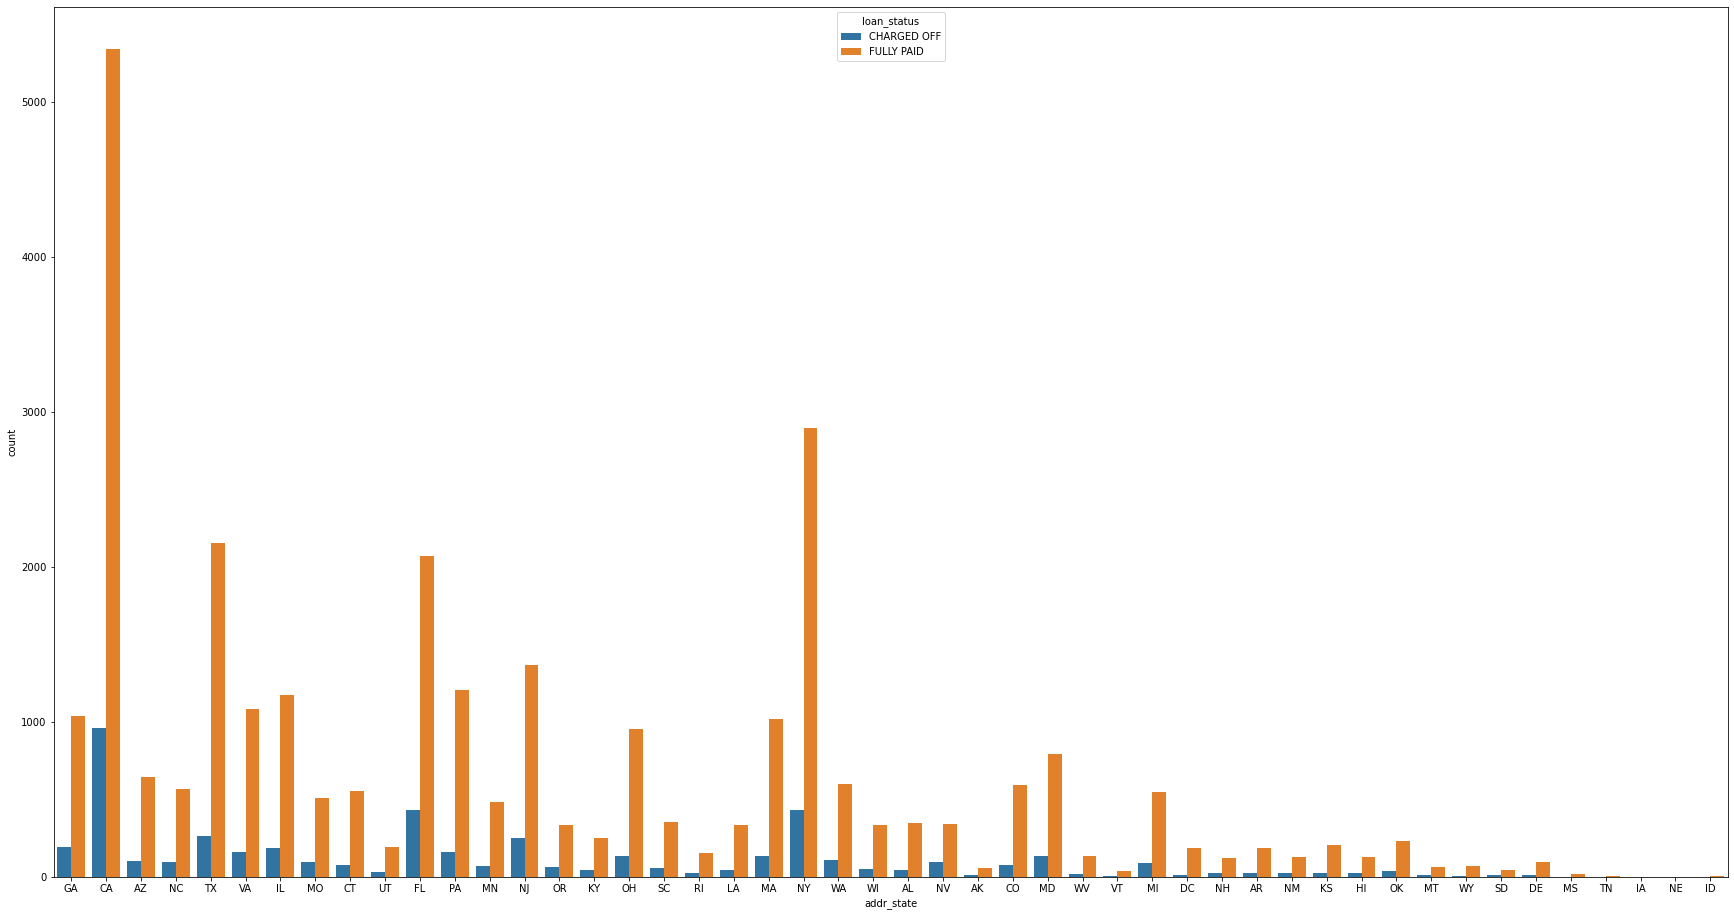

In [774]:
plt.figure(figsize=(30,16))
sns.countplot(x='addr_state', hue='loan_status', data=loan_df)
plt.show()

 Observation 
 
 **highest shares of loans are from CA FL NY Texas**
 
 It seems the number of loans paid and charged off is having positive correlation


**annual_inc**

In [775]:
loan_df.annual_inc.describe()

count    34871.00
mean     65110.21
std      33158.79
min       4000.00
25%      41000.00
50%      59000.00
75%      80004.00
max     200000.00
Name: annual_inc, dtype: float64

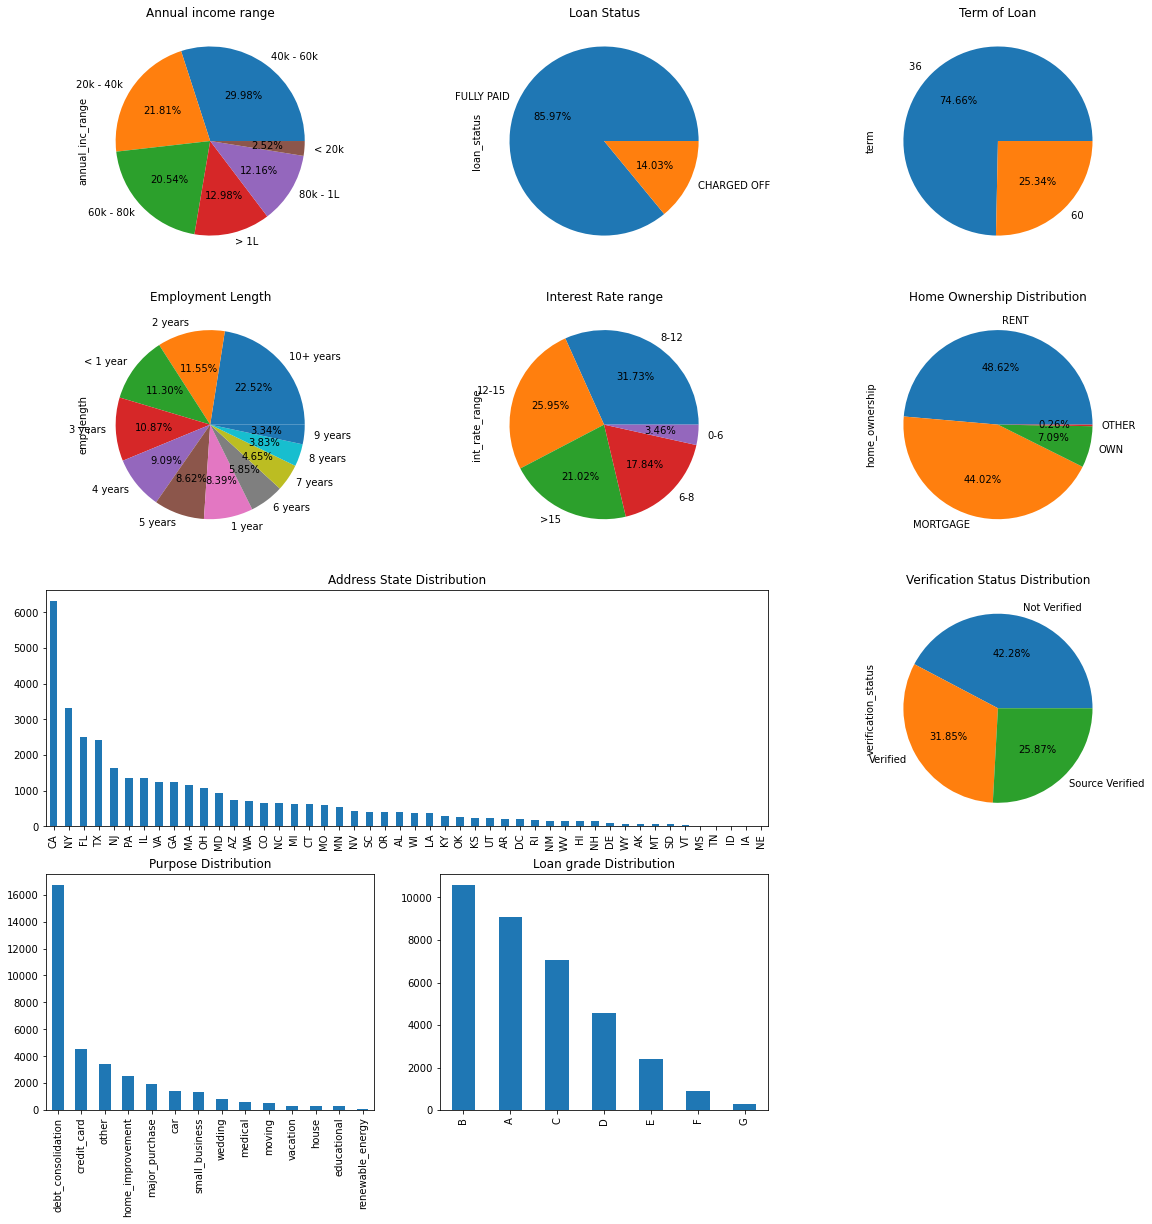

In [776]:
plt.figure(figsize=(20, 20))
plt.subplot(4,3,1)
loan_df.annual_inc_range.value_counts().plot.pie(autopct='%.2f%%')
plt.title('Annual income range')

plt.subplot(4,3,2)
loan_df.loan_status.value_counts().plot.pie(autopct='%.2f%%')
plt.title('Loan Status')

plt.subplot(4,3,3)
loan_df.term.value_counts().plot.pie(autopct='%.2f%%')
plt.title('Term of Loan')

plt.subplot(4,3,4)
loan_df.emp_length.value_counts().plot.pie(autopct='%.2f%%')
plt.title('Employment Length')


plt.subplot(4,3,5)
loan_df.int_rate_range.value_counts().plot.pie(autopct='%.2f%%')
plt.title('Interest Rate range')

plt.subplot(4,3,6)
loan_df.home_ownership.value_counts().plot.pie(autopct='%.2f%%')
plt.title('Home Ownership Distribution')



plt.subplot(4,3,(7,8))
loan_df.addr_state.value_counts().plot(kind='bar')
plt.title('Address State Distribution')


plt.subplot(4,3,9)
loan_df.verification_status.value_counts().plot.pie(autopct='%.2f%%')
plt.title('Verification Status Distribution')

plt.subplot(4,3,10)
loan_df.purpose.value_counts().plot.bar()
plt.title('Purpose Distribution')

plt.subplot(4,3,11)
loan_df.grade.value_counts().plot.bar()
plt.title('Loan grade Distribution')

#plt.subplot(4,3,(11,12))
#loan_df.sub_grade.value_counts().plot.bar()
#plt.title('Loan grade Distribution')

plt.show()



In [777]:
loan_df.dtypes[loan_df.dtypes != object].index

Index(['annual_inc', 'collection_recovery_fee', 'delinq_2yrs', 'dti',
       'inq_last_6mths', 'installment', 'int_rate', 'last_pymnt_amnt',
       'loan_amnt', 'open_acc', 'out_prncp', 'out_prncp_inv', 'pub_rec',
       'pub_rec_bankruptcies', 'recoveries', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int',
       'total_rec_late_fee', 'total_rec_prncp', 'loan_ratio',
       'annual_inc_range', 'int_rate_range'],
      dtype='object')

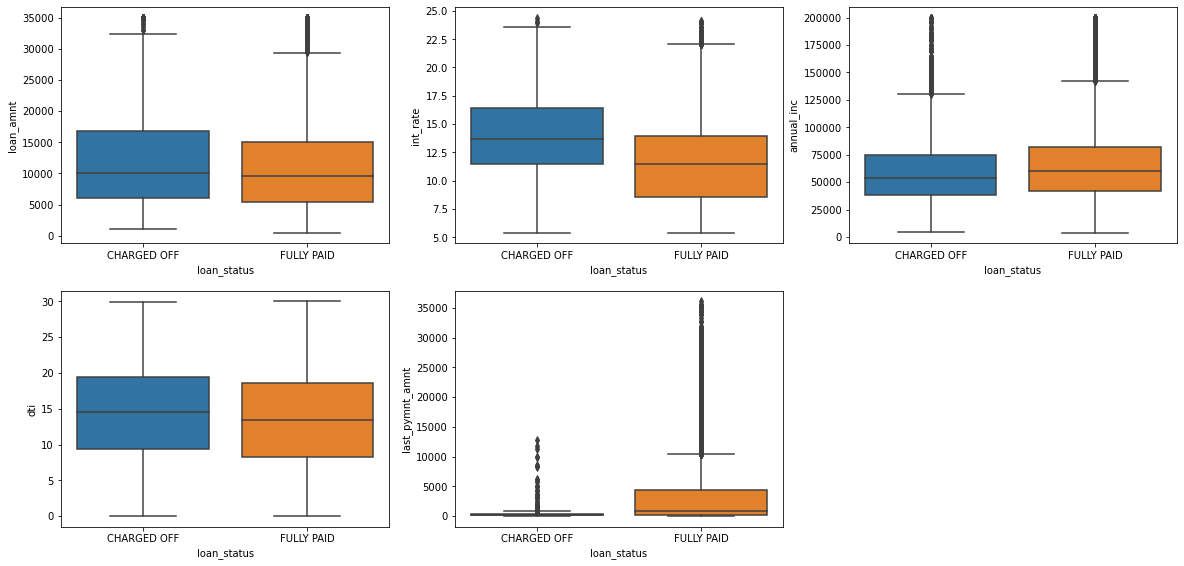

In [778]:
plt.figure(figsize=(20, 20))
plt.subplot(4,3,1)
sns.boxplot(y='loan_amnt', x='loan_status', data=loan_df )   
plt.subplot(4,3,2)
sns.boxplot(y='int_rate', x='loan_status', data=loan_df ) 
plt.subplot(4,3,3)
sns.boxplot(y='annual_inc', x='loan_status', data=loan_df ) 
plt.subplot(4,3,4)
sns.boxplot(y='dti', x='loan_status', data=loan_df ) 
plt.subplot(4,3,5)
sns.boxplot(y='last_pymnt_amnt', x='loan_status', data=loan_df ) 
plt.show()

In [785]:
loan_df.out_prncp.value_counts()

0.00    34871
Name: out_prncp, dtype: int64

In [786]:
loan_df.out_prncp_inv.value_counts()

0.00    34871
Name: out_prncp_inv, dtype: int64

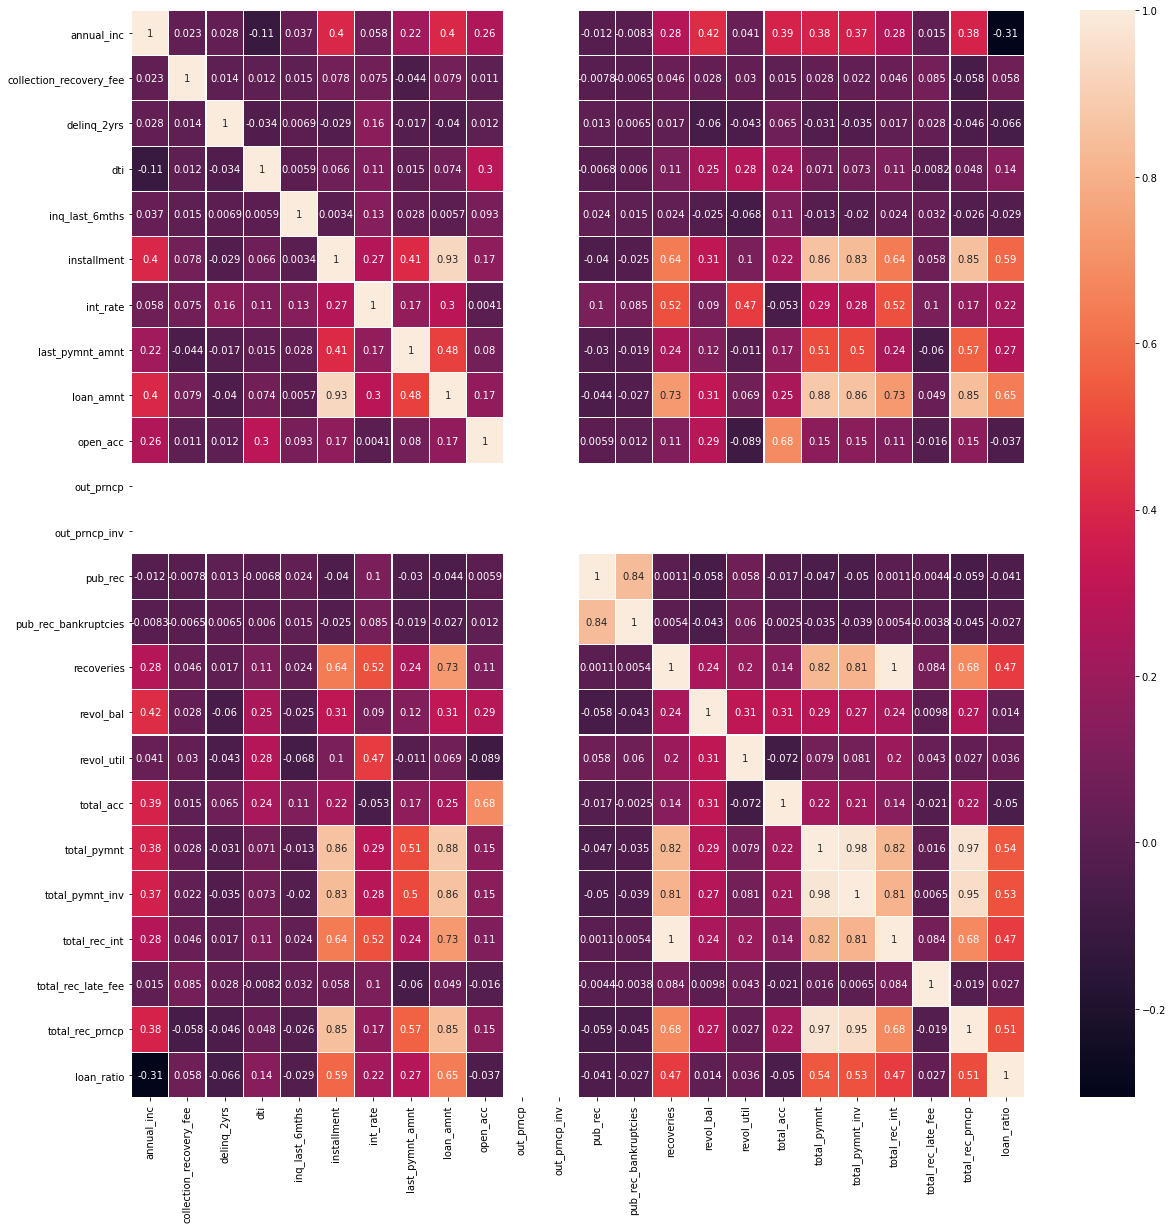

In [787]:
plt.figure(figsize=(20, 20))
sns.heatmap(loan_df.corr(),annot=True,linewidths=.1)
plt.show()